In [ ]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

In [ ]:
# what is it?
type(countries)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# dimensions
countries.shape

(252, 2)

In [ ]:
# names
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [ ]:
# types
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


In [ ]:
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [ ]:
# to upper case.
countries['COUNTRY']=countries.COUNTRY.str.upper()

In [ ]:
import pandas as pd

fragilityCiaLink="https://github.com/CienciaDeDatosEspacial/merging/raw/main/FragilityCia_isos.csv"

fragilityCia=pd.read_csv(fragilityCiaLink)

fragilityCia.head()

,Officialstatename,InternetccTLD,iso2,iso3,Country,fragility_date,fragility,co2,co2_date,region,ForestRev_gdp,ForestRev_date
0,The Islamic Republic of Afghanistan,.af,AF,AFG,AFGHANISTAN,2019,105.0,7893000.0,2019,SOUTH ASIA,0.20,2018
1,The Republic of Albania,.al,AL,ALB,ALBANIA,2019,58.9,3794000.0,2019,EUROPE,0.18,2018
2,The People's Democratic Republic of Algeria,.dz,DZ,DZA,ALGERIA,2019,75.4,151633000.0,2019,AFRICA,0.10,2018
3,The Republic of Angola,.ao,AO,AGO,ANGOLA,2019,87.8,19362000.0,2019,AFRICA,0.36,2018
4,Antigua and Barbuda,.ag,AG,ATG,ANTIGUA AND BARBUDA,2019,54.4,729000.0,2019,CENTRAL AMERICA AND THE CARIBBEAN,0.00,2018


In [ ]:
onlyfragilityCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

In [ ]:
onlyfragilityCia

{'BAHAMAS (THE)',
 'BOLIVIA (PLURINATIONAL STATE OF)',
 'BRUNEI DARUSSALAM',
 'CABO VERDE',
 'CENTRAL AFRICAN REPUBLIC (THE)',
 'COMOROS (THE)',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
 'CONGO (THE)',
 'CZECHIA',
 "CÔTE D'IVOIRE",
 'DOMINICAN REPUBLIC (THE)',
 'ESWATINI',
 'GAMBIA (THE)',
 'IRAN (ISLAMIC REPUBLIC OF)',
 'KOREA (THE REPUBLIC OF)',
 "LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
 'MICRONESIA (FEDERATED STATES OF)',
 'MOLDOVA (THE REPUBLIC OF)',
 'NETHERLANDS (THE)',
 'NIGER (THE)',
 'NORTH MACEDONIA',
 'PHILIPPINES (THE)',
 'RUSSIAN FEDERATION (THE)',
 'SAMOA',
 'SUDAN (THE)',
 'TANZANIA, THE UNITED REPUBLIC OF',
 'TIMOR-LESTE',
 'UNITED ARAB EMIRATES (THE)',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)',
 'UNITED STATES OF AMERICA (THE)',
 'VIET NAM'}

In [ ]:
# and here
onlyMap

{'AMERICAN SAMOA (US)',
 'AMERICAN VIRGIN ISLANDS (US)',
 'ANDORRA',
 'ANGUILLA (UK)',
 'ANTARCTICA',
 'ARUBA (NETHERLANDS)',
 'BAHAMAS',
 'BAKER ISLAND (US)',
 'BERMUDA (UK)',
 'BOLIVIA',
 'BONAIRE (NETHERLANDS)',
 'BOUVET ISLAND (NORWAY)',
 'BRITISH INDIAN OCEAN TERRITORY (UK)',
 'BRITISH VIRGIN ISLANDS(UK)',
 'BRUNEI',
 'CAPE VERDE',
 'CAYMAN ISLANDS (UK)',
 'CENTRAL AFRICAN REPUBLIC',
 'CHRISTMAS ISLAND (AUSTRALIA)',
 'COCOS (KEELING) ISLANDS (AUSTRALIA)',
 'COMOROS',
 'CONGO',
 'COOK ISLANDS (NEW ZEALAND)',
 'CURACAO (NETHERLANDS)',
 'CZECH REPUBLIC',
 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'DOMINICA',
 'DOMINICAN REPUBLIC',
 'EAST TIMOR',
 'ERITREA',
 'FALKLAND ISLANDS (UK)',
 'FAROE ISLANDS (DENMARK)',
 'FEDERATED STATES OF MICRONESIA',
 'FRENCH GUIANA (FRANCE)',
 'FRENCH POLYNESIA (FRANCE)',
 'FRENCH SOUTHERN & ANTARCTIC LANDS (FRANCE)',
 'GAMBIA',
 'GIBRALTAR (UK)',
 'GLORIOSO ISLANDS (FRANCE)',
 'GREENLAND (DENMARK)',
 'GUADELOUPE (FRANCE)',
 'GUAM (US)',
 'GUERNSEY (UK)',
 'HE

In [ ]:
!pip install thefuzz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 9.3 MB/s eta 0:00:00


In [ ]:
from thefuzz import process

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyfragilityCia)]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CABO VERDE', ('CAPE VERDE', 80)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('ESWATINI', ('LIECHTENSTEIN', 60)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('KOREA (THE REPUBLIC OF)', ('CZECH REPUBLIC', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('CZECH REPUBLIC', 86)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORTH MACE

In [ ]:
# subsetting
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyfragilityCia)
 if process.extractOne(country,onlyMap)[1]>=90]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORTH MACEDONIA', ('MACEDONIA', 90)),
 ('PHILIPPINES (THE)', ('PHILIPPINES', 95)),
 ('RUSSIAN FEDERATION (THE)', ('RUSSIA', 90)),
 ('SAMOA', ('WESTERN SAMOA', 90)),
 ('SUDAN (THE)', ('SUDAN', 90)),
 ('TANZANIA, THE UNITED REPUBLIC OF', ('TANZANIA', 90)),
 ('UNITED ARAB EMIRATES (THE)', 

In [ ]:
# then:
try1={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyfragilityCia)
 if process.extractOne(country,onlyMap)[1]>=90}
try1

{'BAHAMAS (THE)': 'BAHAMAS',
 'BOLIVIA (PLURINATIONAL STATE OF)': 'BOLIVIA',
 'BRUNEI DARUSSALAM': 'BRUNEI',
 'CENTRAL AFRICAN REPUBLIC (THE)': 'CENTRAL AFRICAN REPUBLIC',
 'COMOROS (THE)': 'COMOROS',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'CONGO (THE)': 'CONGO',
 'DOMINICAN REPUBLIC (THE)': 'DOMINICAN REPUBLIC',
 'GAMBIA (THE)': 'GAMBIA',
 'IRAN (ISLAMIC REPUBLIC OF)': 'IRAN',
 'MICRONESIA (FEDERATED STATES OF)': 'FEDERATED STATES OF MICRONESIA',
 'MOLDOVA (THE REPUBLIC OF)': 'MOLDOVA',
 'NETHERLANDS (THE)': 'NETHERLANDS',
 'NIGER (THE)': 'NIGER',
 'NORTH MACEDONIA': 'MACEDONIA',
 'PHILIPPINES (THE)': 'PHILIPPINES',
 'RUSSIAN FEDERATION (THE)': 'RUSSIA',
 'SAMOA': 'WESTERN SAMOA',
 'SUDAN (THE)': 'SUDAN',
 'TANZANIA, THE UNITED REPUBLIC OF': 'TANZANIA',
 'UNITED ARAB EMIRATES (THE)': 'UNITED ARAB EMIRATES',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)': 'UNITED KINGDOM',
 'UNITED STATES OF AMERICA (THE)': 'UNITED STATES',
 'VIET

In [ ]:
fragilityCia.replace(to_replace={'Country':try1},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('ESWATINI', ('LIECHTENSTEIN', 60)),
 ('KOREA (THE REPUBLIC OF)', ('CZECH REPUBLIC', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('CZECH REPUBLIC', 86)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [ ]:
# some manual

countries[countries.COUNTRY.str.contains('LAO|ESW|SWA')]

,COUNTRY,geometry
17,BOTSWANA,"POLYGON ((26.40114 -24.63189, 26.38996 -24.627..."
126,LAOS,"POLYGON ((104.25700 17.88763, 104.23943 17.937..."
243,SWAZILAND,"POLYGON ((30.89944 -26.77195, 30.88028 -26.793..."


In [ ]:
manualChanges={'SWAZILAND':'ESWATINI','LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)"}

countries.replace(to_replace={'COUNTRY':manualChanges},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('KOREA (THE REPUBLIC OF)', ('CZECH REPUBLIC', 86)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [ ]:
# then:
try2={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)}
try2

{'CABO VERDE': 'CAPE VERDE',
 'CZECHIA': 'CZECH REPUBLIC',
 "CÔTE D'IVOIRE": 'IVORY COAST',
 'KOREA (THE REPUBLIC OF)': 'CZECH REPUBLIC',
 'TIMOR-LESTE': 'EAST TIMOR'}

In [ ]:
# changing
fragilityCia.replace(to_replace={'Country':try2},inplace=True)

# new update
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[]

In [ ]:
theMapAndData=countries.merge(fragilityCia,left_on='COUNTRY', right_on='Country')

theMapAndData.drop(columns=['Country'],inplace=True) # no need for this column
# here it is (new map):
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   COUNTRY            171 non-null    object  
 1   geometry           171 non-null    geometry
 2   Officialstatename  171 non-null    object  
 3   InternetccTLD      171 non-null    object  
 4   iso2               170 non-null    object  
 5   iso3               171 non-null    object  
 6   fragility_date     171 non-null    int64   
 7   fragility          171 non-null    float64 
 8   co2                171 non-null    float64 
 9   co2_date           171 non-null    int64   
 10  region             171 non-null    object  
 11  ForestRev_gdp      171 non-null    float64 
 12  ForestRev_date     171 non-null    int64   
dtypes: float64(3), geometry(1), int64(3), object(6)
memory usage: 17.5+ KB


Choropleths

In [ ]:
DataNames=['co2', 'ForestRev_gdp']

In [ ]:
pd.melt(theMapAndData[DataNames])

,variable,value
0,co2,7.290000e+05
1,co2,7.893000e+06
2,co2,1.516330e+08
3,co2,3.538900e+07
4,co2,3.794000e+06
...,...,...
337,ForestRev_gdp,4.450000e+00
338,ForestRev_gdp,1.610000e+00
339,ForestRev_gdp,2.650000e+00
340,ForestRev_gdp,3.900000e-01


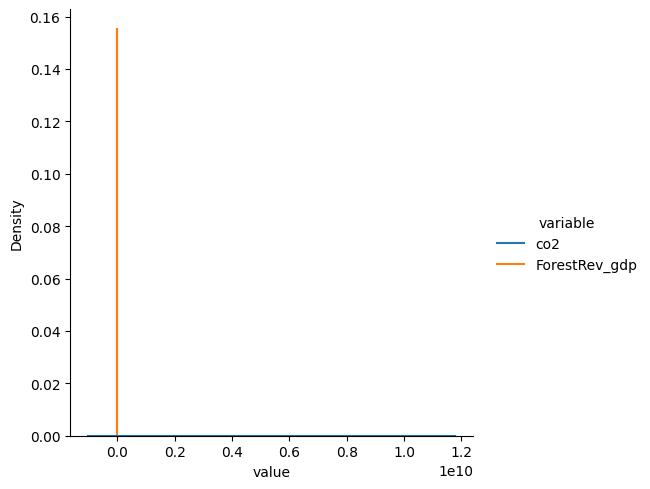

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(pd.melt(theMapAndData[DataNames]),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

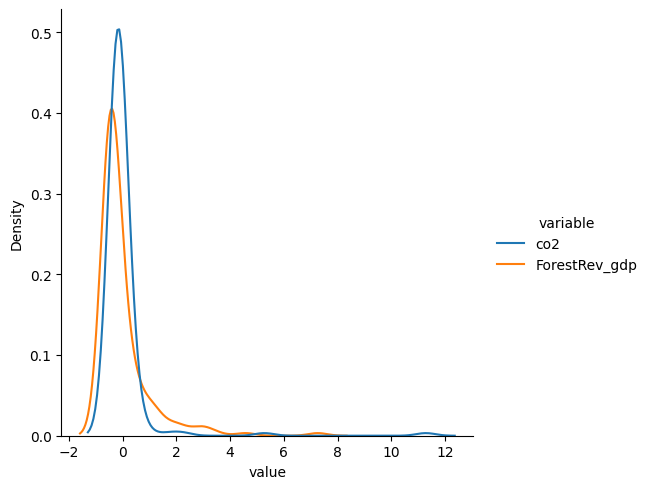

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(theMapAndData[DataNames])
sns.displot(pd.melt(pd.DataFrame(normalized_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

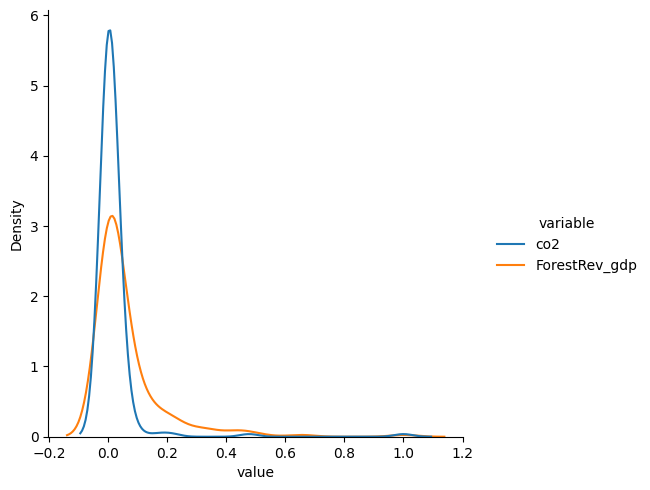

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(scaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

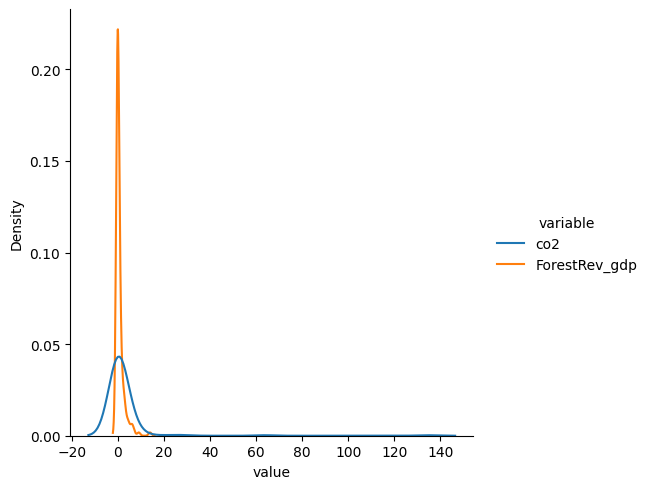

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(robScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

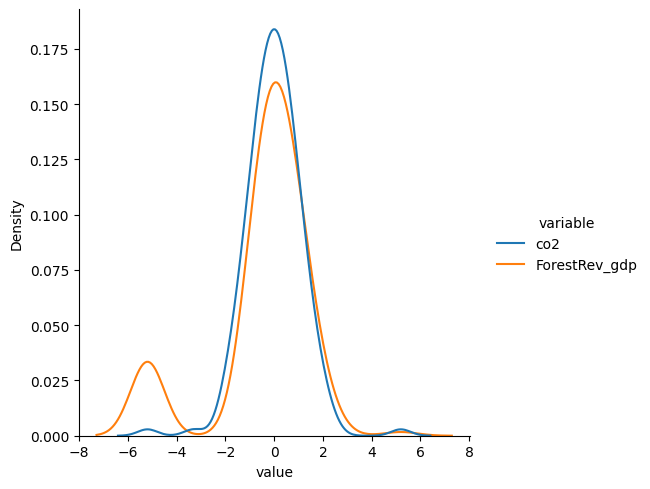

In [ ]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [ ]:
theMapAndData['co2_Qt']=QtScaled_data[:,0]

In [ ]:
!pip install numba

In [ ]:
!pip install pysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 28.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install mapclassify

In [ ]:
!pip install numpy

In [ ]:
! pip show numba mapclassify numpy

Name: numba
Version: 0.58.1
Summary: compiling Python code using LLVM
Home-page: https://numba.pydata.org
Author: 
Author-email: 
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: llvmlite, numpy
Required-by: cudf-cu12, librosa, quantecon, rmm-cu12, segregation
---
Name: mapclassify
Version: 2.6.1
Summary: Classification Schemes for Choropleth Maps.
Home-page: 
Author: 
Author-email: 
License: BSD 3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: networkx, numpy, pandas, scikit-learn, scipy
Required-by: pysal, segregation, splot, spopt
---
Name: numpy
Version: 1.25.2
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: access, albumentations, altair, arviz, astropy, autograd, blis, bokeh, bqplot, chex, cmdstanpy, contourpy, cudf-cu12, cufflinks, cupy-cuda12x, cvxp

In [ ]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.co2_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

In [ ]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

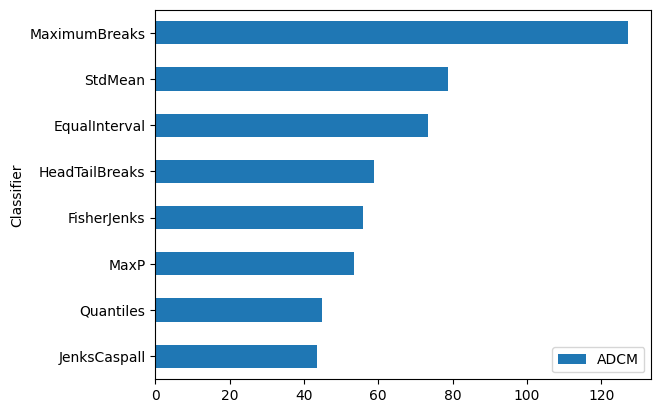

In [ ]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [ ]:
theMapAndData['co2_Qt_jc5'] = jc5.yb

In [ ]:
# there you are
theMapAndData[['co2_Qt','co2_Qt_jc5']].head()

,co2_Qt,co2_Qt_jc5
0,-1.417436,0
1,-0.312096,1
2,0.903225,3
3,0.282063,2
4,-0.757475,1


In [ ]:
indexList=['co2_Qt_jc5']
aggregator={'co2_Qt': ['mean']}

pd.concat([theMapAndData[['co2_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,co2_Qt_jc5,co2_Qt
,,mean
0,0,-1.663108
1,1,-0.623926
2,2,0.014829
3,3,0.640064
4,4,1.630121


In [ ]:
# renaming
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData['co2_Qt_jc5_cat']=theMapAndData.loc[:,'co2_Qt_jc5'].replace(newLabelsForLevels)

# we have
theMapAndData[['co2_Qt','co2_Qt_jc5','co2_Qt_jc5_cat']].head(20)

,co2_Qt,co2_Qt_jc5,co2_Qt_jc5_cat
0,-1.417436,0,0_Great
1,-0.312096,1,1_Good
2,0.903225,3,3_Bad
3,0.282063,2,2_Middle
4,-0.757475,1,1_Good
5,-0.514615,1,1_Good
6,0.106163,2,2_Middle
7,0.956291,3,3_Bad
8,1.417745,4,4_Poor
9,0.593317,3,3_Bad


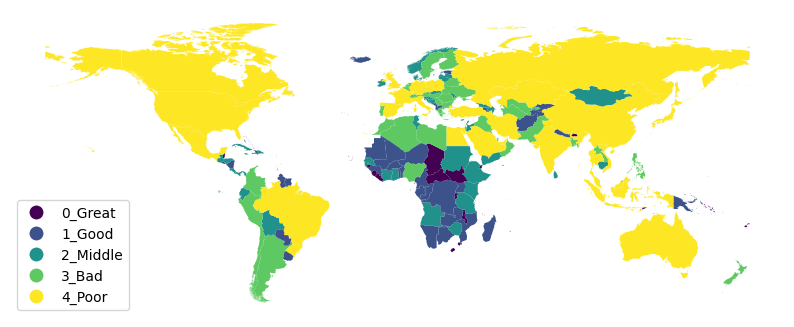

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='co2_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

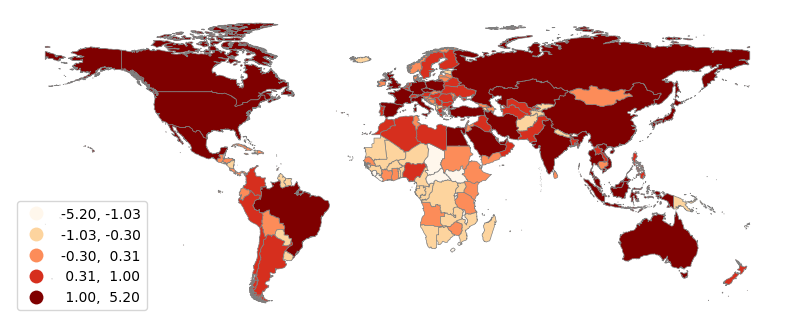

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='co2_Qt',
                   cmap='OrRd',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

In [ ]:
# finally

theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='indicators', driver="GPKG")

FORESTREV


In [ ]:
DataNames2=['ForestRev_gdp']

In [ ]:
pd.melt(theMapAndData[DataNames2])

,variable,value
0,ForestRev_gdp,0.00
1,ForestRev_gdp,0.20
2,ForestRev_gdp,0.10
3,ForestRev_gdp,0.02
4,ForestRev_gdp,0.18
...,...,...
166,ForestRev_gdp,4.45
167,ForestRev_gdp,1.61
168,ForestRev_gdp,2.65
169,ForestRev_gdp,0.39


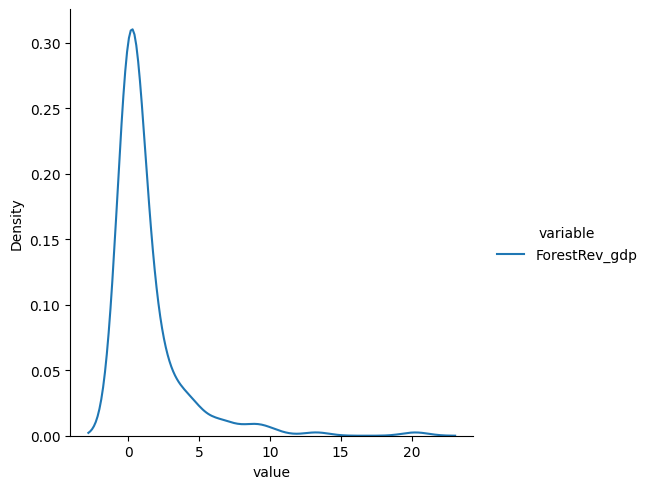

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(pd.melt(theMapAndData[DataNames2]),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

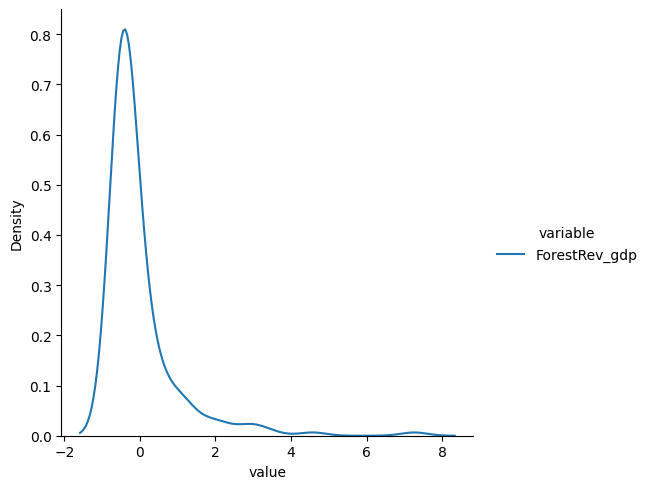

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(theMapAndData[DataNames2])
sns.displot(pd.melt(pd.DataFrame(normalized_data,columns=DataNames2)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

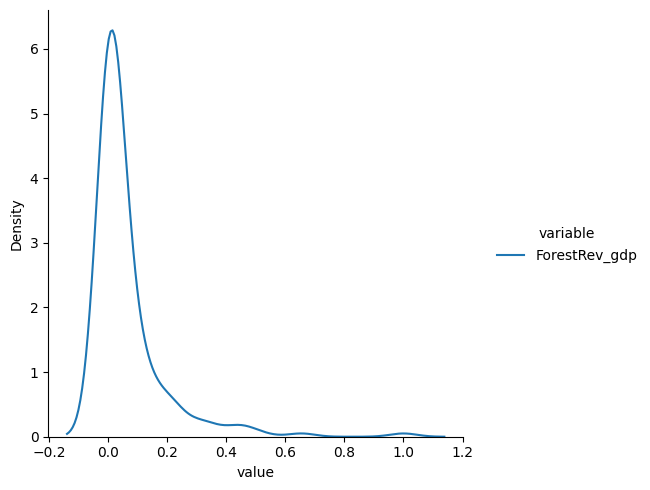

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(theMapAndData[DataNames2])

sns.displot(pd.melt(pd.DataFrame(scaled_data,columns=DataNames2)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

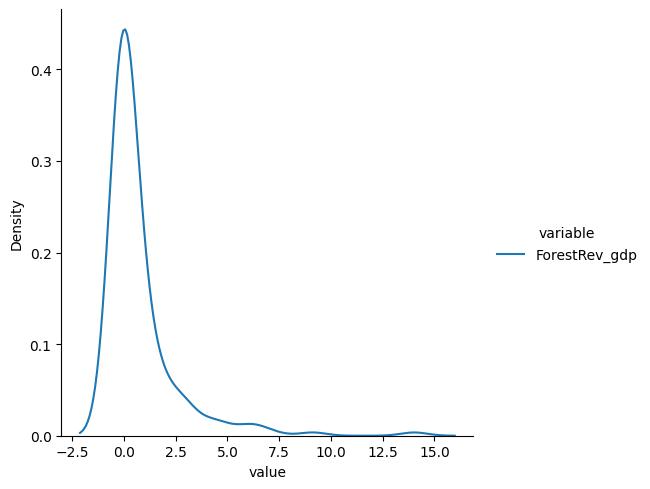

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robScaled_data = scaler.fit_transform(theMapAndData[DataNames2])

sns.displot(pd.melt(pd.DataFrame(robScaled_data,columns=DataNames2)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

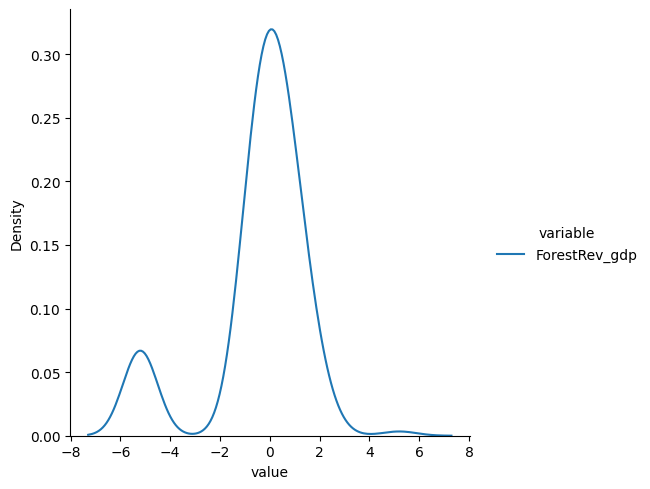

In [ ]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(theMapAndData[DataNames2])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames2)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [ ]:
theMapAndData['ForestRev_gdp_Qt']=QtScaled_data[:,0]

In [ ]:
! pip show numba mapclassify numpy

Name: numba
Version: 0.58.1
Summary: compiling Python code using LLVM
Home-page: https://numba.pydata.org
Author: 
Author-email: 
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: llvmlite, numpy
Required-by: cudf-cu12, librosa, quantecon, rmm-cu12, segregation
---
Name: mapclassify
Version: 2.6.1
Summary: Classification Schemes for Choropleth Maps.
Home-page: 
Author: 
Author-email: 
License: BSD 3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: networkx, numpy, pandas, scikit-learn, scipy
Required-by: pysal, segregation, splot, spopt
---
Name: numpy
Version: 1.25.2
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: access, albumentations, altair, arviz, astropy, autograd, blis, bokeh, bqplot, chex, cmdstanpy, contourpy, cudf-cu12, cufflinks, cupy-cuda12x, cvxp

In [ ]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.ForestRev_gdp
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

In [ ]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

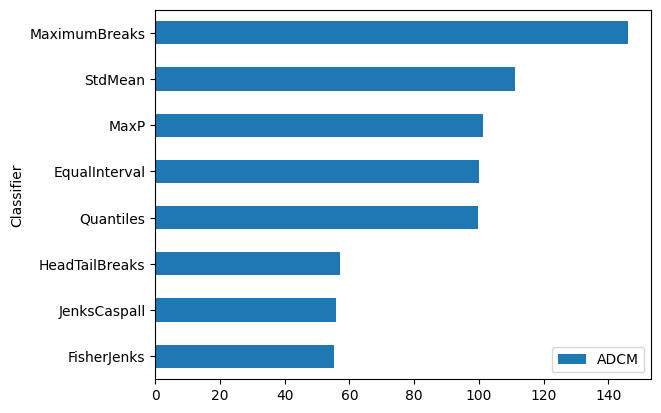

In [ ]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [ ]:
theMapAndData['ForestRev_gdp_Qt_jc5'] = jc5.yb

In [ ]:
# there you are
theMapAndData[['ForestRev_gdp_Qt','ForestRev_gdp_Qt_jc5']].head()

,ForestRev_gdp_Qt,ForestRev_gdp_Qt_jc5
0,-5.199338,0
1,-0.076809,1
2,-0.352465,0
3,-0.827130,0
4,-0.106447,0


In [ ]:
indexList=['ForestRev_gdp_Qt_jc5']
aggregator={'ForestRev_gdp_Qt': ['mean']}

pd.concat([theMapAndData[['ForestRev_gdp_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,ForestRev_gdp_Qt_jc5,ForestRev_gdp_Qt
,,mean
0,0,-1.754261
1,1,0.203812
2,2,0.782725
3,3,1.353722
4,4,2.414789


In [ ]:
# renaming
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData['ForestRev_gdp_Qt_jc5_cat']=theMapAndData.loc[:,'ForestRev_gdp_Qt_jc5'].replace(newLabelsForLevels)

# we have
theMapAndData[['ForestRev_gdp_Qt','ForestRev_gdp_Qt_jc5','ForestRev_gdp_Qt_jc5_cat']].head(20)

,ForestRev_gdp_Qt,ForestRev_gdp_Qt_jc5,ForestRev_gdp_Qt_jc5_cat
0,-5.199338,0,0_Great
1,-0.076809,1,1_Good
2,-0.352465,0,0_Great
3,-0.827130,0,0_Great
4,-0.106447,0,0_Great
5,0.088585,1,1_Good
6,0.206072,1,1_Good
7,-0.421391,0,0_Great
8,-0.271880,0,0_Great
9,-0.536176,0,0_Great


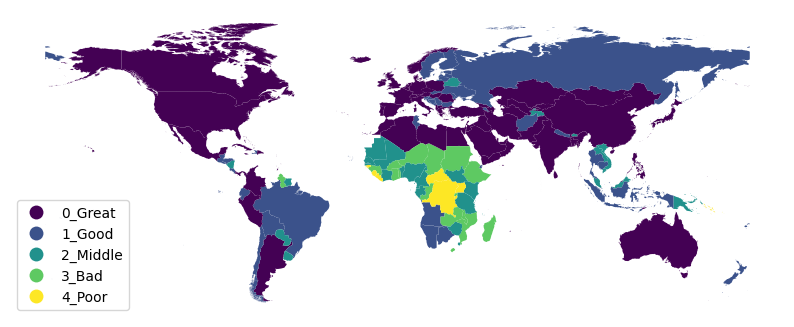

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='ForestRev_gdp_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

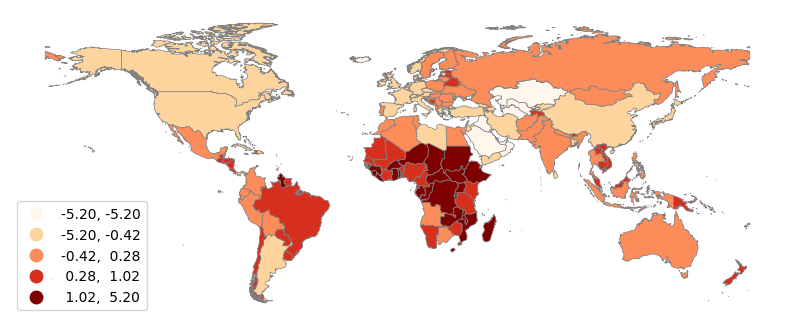

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='ForestRev_gdp_Qt',
                   cmap='OrRd',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

In [ ]:
# finally

theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='indicators', driver="GPKG")

AÑADIR UNA NUEVA VARIABLE


In [ ]:
#Add new DF

import pandas as pd

linkToFile='https://github.com/bnokoro/Data-Science/raw/master/countries%20of%20the%20world.csv'

growthCia=pd.read_csv(linkToFile)

In [ ]:
growthCia.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [ ]:
growthCia['Country']=growthCia.Country.str.upper()

In [ ]:
onlyGrowthCia=set(growthCia.Country)- set(countries.COUNTRY)
onlyMap1=set(countries.COUNTRY)- set(growthCia.Country)

In [ ]:
from thefuzz import process

[(country, process.extractOne(country,onlyMap1)) for country in sorted(onlyGrowthCia)]

[('AFGHANISTAN ', ('AFGHANISTAN', 100)),
 ('ALBANIA ', ('ALBANIA', 100)),
 ('ALGERIA ', ('ALGERIA', 100)),
 ('AMERICAN SAMOA ', ('AMERICAN SAMOA (US)', 95)),
 ('ANDORRA ', ('ANDORRA', 100)),
 ('ANGOLA ', ('ANGOLA', 100)),
 ('ANGUILLA ', ('ANGUILLA (UK)', 90)),
 ('ANTIGUA & BARBUDA ', ('ANTIGUA AND BARBUDA', 95)),
 ('ARGENTINA ', ('ARGENTINA', 100)),
 ('ARMENIA ', ('ARMENIA', 100)),
 ('ARUBA ', ('ARUBA (NETHERLANDS)', 90)),
 ('AUSTRALIA ', ('AUSTRALIA', 100)),
 ('AUSTRIA ', ('AUSTRIA', 100)),
 ('AZERBAIJAN ', ('AZERBAIJAN', 100)),
 ('BAHAMAS, THE ', ('BAHAMAS', 90)),
 ('BAHRAIN ', ('BAHRAIN', 100)),
 ('BANGLADESH ', ('BANGLADESH', 100)),
 ('BARBADOS ', ('BARBADOS', 100)),
 ('BELARUS ', ('BELARUS', 100)),
 ('BELGIUM ', ('BELGIUM', 100)),
 ('BELIZE ', ('BELIZE', 100)),
 ('BENIN ', ('BENIN', 100)),
 ('BERMUDA ', ('BERMUDA (UK)', 90)),
 ('BHUTAN ', ('BHUTAN', 100)),
 ('BOLIVIA ', ('BOLIVIA', 100)),
 ('BOSNIA & HERZEGOVINA ', ('BOSNIA AND HERZEGOVINA', 95)),
 ('BOTSWANA ', ('BOTSWANA', 100))

In [ ]:
# subsetting
[(country, process.extractOne(country,onlyMap1)) for country in sorted(onlyGrowthCia)
 if process.extractOne(country,onlyMap1)[1]>=90]

[('AFGHANISTAN ', ('AFGHANISTAN', 100)),
 ('ALBANIA ', ('ALBANIA', 100)),
 ('ALGERIA ', ('ALGERIA', 100)),
 ('AMERICAN SAMOA ', ('AMERICAN SAMOA (US)', 95)),
 ('ANDORRA ', ('ANDORRA', 100)),
 ('ANGOLA ', ('ANGOLA', 100)),
 ('ANGUILLA ', ('ANGUILLA (UK)', 90)),
 ('ANTIGUA & BARBUDA ', ('ANTIGUA AND BARBUDA', 95)),
 ('ARGENTINA ', ('ARGENTINA', 100)),
 ('ARMENIA ', ('ARMENIA', 100)),
 ('ARUBA ', ('ARUBA (NETHERLANDS)', 90)),
 ('AUSTRALIA ', ('AUSTRALIA', 100)),
 ('AUSTRIA ', ('AUSTRIA', 100)),
 ('AZERBAIJAN ', ('AZERBAIJAN', 100)),
 ('BAHAMAS, THE ', ('BAHAMAS', 90)),
 ('BAHRAIN ', ('BAHRAIN', 100)),
 ('BANGLADESH ', ('BANGLADESH', 100)),
 ('BARBADOS ', ('BARBADOS', 100)),
 ('BELARUS ', ('BELARUS', 100)),
 ('BELGIUM ', ('BELGIUM', 100)),
 ('BELIZE ', ('BELIZE', 100)),
 ('BENIN ', ('BENIN', 100)),
 ('BERMUDA ', ('BERMUDA (UK)', 90)),
 ('BHUTAN ', ('BHUTAN', 100)),
 ('BOLIVIA ', ('BOLIVIA', 100)),
 ('BOSNIA & HERZEGOVINA ', ('BOSNIA AND HERZEGOVINA', 95)),
 ('BOTSWANA ', ('BOTSWANA', 100))

In [ ]:
# then:
try1={country: process.extractOne(country,onlyMap1)[0] for country in sorted(onlyGrowthCia)
 if process.extractOne(country,onlyMap1)[1]>=90}
try1

{'AFGHANISTAN ': 'AFGHANISTAN',
 'ALBANIA ': 'ALBANIA',
 'ALGERIA ': 'ALGERIA',
 'AMERICAN SAMOA ': 'AMERICAN SAMOA (US)',
 'ANDORRA ': 'ANDORRA',
 'ANGOLA ': 'ANGOLA',
 'ANGUILLA ': 'ANGUILLA (UK)',
 'ANTIGUA & BARBUDA ': 'ANTIGUA AND BARBUDA',
 'ARGENTINA ': 'ARGENTINA',
 'ARMENIA ': 'ARMENIA',
 'ARUBA ': 'ARUBA (NETHERLANDS)',
 'AUSTRALIA ': 'AUSTRALIA',
 'AUSTRIA ': 'AUSTRIA',
 'AZERBAIJAN ': 'AZERBAIJAN',
 'BAHAMAS, THE ': 'BAHAMAS',
 'BAHRAIN ': 'BAHRAIN',
 'BANGLADESH ': 'BANGLADESH',
 'BARBADOS ': 'BARBADOS',
 'BELARUS ': 'BELARUS',
 'BELGIUM ': 'BELGIUM',
 'BELIZE ': 'BELIZE',
 'BENIN ': 'BENIN',
 'BERMUDA ': 'BERMUDA (UK)',
 'BHUTAN ': 'BHUTAN',
 'BOLIVIA ': 'BOLIVIA',
 'BOSNIA & HERZEGOVINA ': 'BOSNIA AND HERZEGOVINA',
 'BOTSWANA ': 'BOTSWANA',
 'BRAZIL ': 'BRAZIL',
 'BRUNEI ': 'BRUNEI',
 'BULGARIA ': 'BULGARIA',
 'BURKINA FASO ': 'BURKINA FASO',
 'BURUNDI ': 'BURUNDI',
 'CAMBODIA ': 'CAMBODIA',
 'CAMEROON ': 'CAMEROON',
 'CANADA ': 'CANADA',
 'CAPE VERDE ': 'CAPE VERDE',
 '

In [ ]:
growthCia.replace(to_replace={'Country':try1},inplace=True)

# updating
onlyGrowthCia=set(growthCia.Country)- set(countries.COUNTRY)
onlyMap1=set(countries.COUNTRY)- set(growthCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap1)) for country in sorted(onlyGrowthCia)]

[('BRITISH VIRGIN IS. ', ('BRITISH INDIAN OCEAN TERRITORY (UK)', 86)),
 ('BURMA ', ('CURACAO (NETHERLANDS)', 60)),
 ('CENTRAL AFRICAN REP. ', ('CENTRAL AFRICAN REPUBLIC', 88)),
 ("COTE D'IVOIRE ", ('IVORY COAST', 63)),
 ('GAZA STRIP ', ('CHRISTMAS ISLAND (AUSTRALIA)', 48)),
 ('HONG KONG ', ('DEMOCRATIC REPUBLIC OF THE CONGO', 55)),
 ('LAOS ', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 51)),
 ('MACAU ', ('CURACAO (NETHERLANDS)', 54)),
 ('MICRONESIA, FED. ST. ', ('FEDERATED STATES OF MICRONESIA', 86)),
 ('N. MARIANA ISLANDS ', ('TURKS AND CAICOS ISLANDS (UK)', 86)),
 ('SAINT HELENA ', ('ST. HELENA (UK)', 71)),
 ('SAINT KITTS & NEVIS ', ('ST. KITTS AND NEVIS', 81)),
 ('SAINT LUCIA ', ('ST. LUCIA', 80)),
 ('ST PIERRE & MIQUELON ', ('ST. PIERRE AND MIQUELON (FRANCE)', 86)),
 ('SWAZILAND ', ('NIUE (NEW ZEALAND)', 64)),
 ('TURKS & CAICOS IS ', ('TURKS AND CAICOS ISLANDS (UK)', 86)),
 ('WEST BANK ', ('BAKER ISLAND (US)', 53))]

In [ ]:
# some manual

countries[countries.COUNTRY.str.contains('LAO|ESW|SWA|MYA|HONG|KOS')]

,COUNTRY,geometry
17,BOTSWANA,"POLYGON ((26.40114 -24.63189, 26.38996 -24.627..."
25,MYANMAR,"MULTIPOLYGON (((96.00681 16.38307, 96.06985 16..."
126,LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE),"POLYGON ((104.25700 17.88763, 104.23943 17.937..."
243,ESWATINI,"POLYGON ((30.89944 -26.77195, 30.88028 -26.793..."


In [ ]:
manualChanges={'SWAZILAND':'ESWATINI','LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",'MYANMAR':'BURMA'}

countries.replace(to_replace={'COUNTRY':manualChanges},inplace=True)

# updating
onlyGrowthCia=set(growthCia.Country)- set(countries.COUNTRY)
onlyMap1=set(countries.COUNTRY)- set(growthCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap1)) for country in sorted(onlyGrowthCia)]

[('BRITISH VIRGIN IS. ', ('BRITISH INDIAN OCEAN TERRITORY (UK)', 86)),
 ('BURMA ', ('BURMA', 100)),
 ('CENTRAL AFRICAN REP. ', ('CENTRAL AFRICAN REPUBLIC', 88)),
 ("COTE D'IVOIRE ", ('IVORY COAST', 63)),
 ('GAZA STRIP ', ('CHRISTMAS ISLAND (AUSTRALIA)', 48)),
 ('HONG KONG ', ('DEMOCRATIC REPUBLIC OF THE CONGO', 55)),
 ('LAOS ', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 51)),
 ('MACAU ', ('CURACAO (NETHERLANDS)', 54)),
 ('MICRONESIA, FED. ST. ', ('FEDERATED STATES OF MICRONESIA', 86)),
 ('N. MARIANA ISLANDS ', ('TURKS AND CAICOS ISLANDS (UK)', 86)),
 ('SAINT HELENA ', ('ST. HELENA (UK)', 71)),
 ('SAINT KITTS & NEVIS ', ('ST. KITTS AND NEVIS', 81)),
 ('SAINT LUCIA ', ('ST. LUCIA', 80)),
 ('ST PIERRE & MIQUELON ', ('ST. PIERRE AND MIQUELON (FRANCE)', 86)),
 ('SWAZILAND ', ('NIUE (NEW ZEALAND)', 64)),
 ('TURKS & CAICOS IS ', ('TURKS AND CAICOS ISLANDS (UK)', 86)),
 ('WEST BANK ', ('BAKER ISLAND (US)', 53))]

In [ ]:
# then:
try2={country: process.extractOne(country,onlyMap1)[0] for country in sorted(onlyGrowthCia)}
try2

{'BRITISH VIRGIN IS. ': 'BRITISH INDIAN OCEAN TERRITORY (UK)',
 'BURMA ': 'BURMA',
 'CENTRAL AFRICAN REP. ': 'CENTRAL AFRICAN REPUBLIC',
 "COTE D'IVOIRE ": 'IVORY COAST',
 'GAZA STRIP ': 'CHRISTMAS ISLAND (AUSTRALIA)',
 'HONG KONG ': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'LAOS ': "LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
 'MACAU ': 'CURACAO (NETHERLANDS)',
 'MICRONESIA, FED. ST. ': 'FEDERATED STATES OF MICRONESIA',
 'N. MARIANA ISLANDS ': 'TURKS AND CAICOS ISLANDS (UK)',
 'SAINT HELENA ': 'ST. HELENA (UK)',
 'SAINT KITTS & NEVIS ': 'ST. KITTS AND NEVIS',
 'SAINT LUCIA ': 'ST. LUCIA',
 'ST PIERRE & MIQUELON ': 'ST. PIERRE AND MIQUELON (FRANCE)',
 'SWAZILAND ': 'NIUE (NEW ZEALAND)',
 'TURKS & CAICOS IS ': 'TURKS AND CAICOS ISLANDS (UK)',
 'WEST BANK ': 'BAKER ISLAND (US)'}

In [ ]:
# changing
growthCia.replace(to_replace={'Country':try2},inplace=True)

# new update
onlyGrowthCia=set(growthCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(growthCia.Country)

# new matches
[(country, process.extractOne(country,onlyMap1)) for country in sorted(onlyGrowthCia)]

[]

In [ ]:
df1=countries.merge(growthCia,left_on='COUNTRY', right_on='Country')

df1.drop(columns=['Country'],inplace=True) # no need for this column
# here it is (new map):
df1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   COUNTRY                             227 non-null    object  
 1   geometry                            227 non-null    geometry
 2   Region                              227 non-null    object  
 3   Population                          227 non-null    int64   
 4   Area (sq. mi.)                      227 non-null    int64   
 5   Pop. Density (per sq. mi.)          227 non-null    object  
 6   Coastline (coast/area ratio)        227 non-null    object  
 7   Net migration                       224 non-null    object  
 8   Infant mortality (per 1000 births)  224 non-null    object  
 9   GDP ($ per capita)                  226 non-null    float64 
 10  Literacy (%)                        209 non-null    object  
 11  Phones (per 1000)       